<a href="https://colab.research.google.com/github/PRAN20/Full-Body-Segmentation/blob/main/Full_Body_segment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mediapipe --quiet
!pip install jovian --quiet

     |████████████████████████████████| 32.8 MB 1.4 MB/s 
     |████████████████████████████████| 68 kB 4.4 MB/s 


In [3]:
import cv2                  
import mediapipe as mp    
import jovian               
import time                 
import plotly.express as px 

In [4]:
image = cv2.imread("/content/2.jpg")

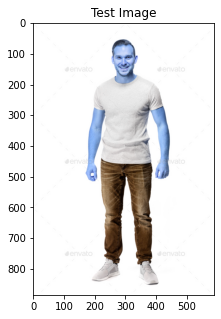

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.title("Test Image")

plt.imshow(image)
plt.show()

In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [7]:
mp_drawing.DrawingSpec(color = (255,255,0),thickness = 1.5, circle_radius=1.5)

DrawingSpec(color=(255, 255, 0), thickness=1.5, circle_radius=1.5)

In [8]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

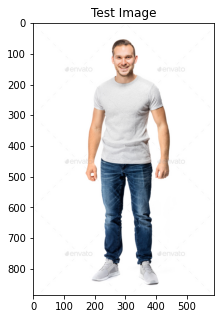

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.title("Test Image")

plt.imshow(image)
plt.show()

In [10]:
image = cv2.flip(image,1)

In [11]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  results = holistic.process(image)

In [12]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [13]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

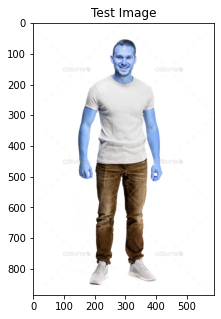

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.title("Test Image")

plt.imshow(image)
plt.show()

In [15]:
mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
  mp_drawing.DrawingSpec(color = (255,255,0),thickness = 2, circle_radius=2),
  mp_drawing.DrawingSpec(color = (255,255,0),thickness = 2, circle_radius=2))

In [16]:
mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
  mp_drawing.DrawingSpec(color = (150,255,0),thickness = 2, circle_radius=2),
  mp_drawing.DrawingSpec(color = (150,255,0),thickness = 2, circle_radius=2))

In [17]:
mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
  mp_drawing.DrawingSpec(color = (150,255,0),thickness = 2, circle_radius=2),
  mp_drawing.DrawingSpec(color = (150,255,0),thickness = 2, circle_radius=2))

In [18]:
mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
 mp_drawing.DrawingSpec(color = (255,0,255),thickness = 2, circle_radius=2),
 mp_drawing.DrawingSpec(color = (255,0,255),thickness = 2, circle_radius=2))

In [19]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

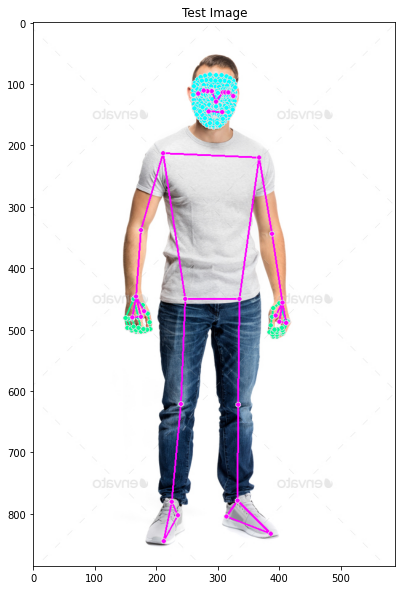

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.title("Test Image")

plt.imshow(image)
plt.savefig("Result.png")
plt.show()

# **Face Detection**

In [21]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

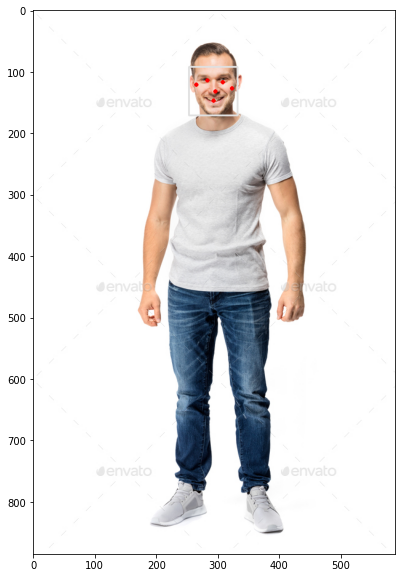

In [22]:
IMAGE_FILES = ["/content/2.jpg"]
with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
    for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
    
        # Convert the BGR image to RGB and process it with MediaPipe Face Detection.
        results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    
        # Draw face detections of each face.
        if not results.detections:
            continue
        annotated_image = image.copy()
        for detection in results.detections:
            mp_drawing.draw_detection(annotated_image, detection)
        cv2.imwrite('FD_annotated_image' + str(idx) + '.png', annotated_image)
        annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize = (10,10))
        plt.imshow(annotated_image)
        plt.show()

# **Left Hand Detection**

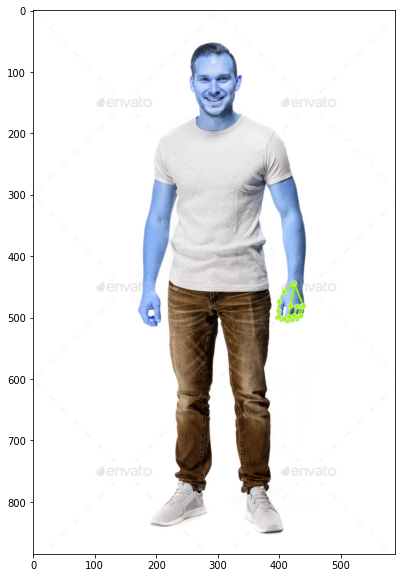

In [23]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  results = holistic.process(image)
  hand_image = annotated_image.copy()
  count = 0
  image1 = image.copy()
  mp_drawing.draw_landmarks(image1, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,  mp_drawing.DrawingSpec(color = (150,255,0),thickness = 2, circle_radius=2),mp_drawing.DrawingSpec(color = (150,255,0),thickness = 2, circle_radius=2))
  plt.figure(figsize=(10,10))
  plt.imshow(image1)
  plt.show()

# **Right Hand Detection**

In [24]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  results = holistic.process(image)
  image2 = image.copy()
  #mp_drawing.draw_detection(annotated_image, detection)
  print(results.pose_landmarks.landmark[18])
  print(results.pose_landmarks.landmark[20])
  print(results.pose_landmarks.landmark[22])

x: 0.30605560541152954
y: 0.5572043657302856
z: -0.2180810421705246
visibility: 0.8635576963424683

x: 0.32356470823287964
y: 0.5564354658126831
z: -0.2909107506275177
visibility: 0.8685888648033142

x: 0.3327198028564453
y: 0.540357232093811
z: -0.2220672070980072
visibility: 0.8634419441223145



# **Right Feet**

In [25]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  results = holistic.process(image)
  image2 = image.copy()
  #mp_drawing.draw_detection(annotated_image, detection)
  print(results.pose_landmarks.landmark[28])
  print(results.pose_landmarks.landmark[30])
  print(results.pose_landmarks.landmark[32])

x: 0.4439648687839508
y: 0.8818252682685852
z: 0.27305281162261963
visibility: 0.9928199648857117

x: 0.47550347447395325
y: 0.9099669456481934
z: 0.2778770327568054
visibility: 0.9004798531532288

x: 0.35355907678604126
y: 0.9389476776123047
z: 0.0702616274356842
visibility: 0.9892169237136841



# **Left Feet**

In [26]:
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  results = holistic.process(image)
  image2 = image.copy()
  #mp_drawing.draw_detection(annotated_image, detection)
  print(results.pose_landmarks.landmark[27])
  print(results.pose_landmarks.landmark[29])
  print(results.pose_landmarks.landmark[31])

x: 0.6124611496925354
y: 0.8814523220062256
z: 0.09569638222455978
visibility: 0.9906518459320068

x: 0.5909191966056824
y: 0.911095142364502
z: 0.0943443700671196
visibility: 0.8385741710662842

x: 0.6551932096481323
y: 0.9497380256652832
z: -0.13735179603099823
visibility: 0.9841126799583435



# **Segmentation of Top**

In [27]:
%cd /content/
!rm -rf cloth-segmentation
!git clone https://github.com/levindabhi/cloth-segmentation.git
%cd cloth-segmentation
!gdown --id 1mhF3yqd7R-Uje092eypktNl-RoZNuiCJ
!mkdir input_images
!mkdir output_images

/content
Cloning into 'cloth-segmentation'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 62 (delta 4), reused 53 (delta 2), pack-reused 6
Unpacking objects: 100% (62/62), done.
/content/cloth-segmentation
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1mhF3yqd7R-Uje092eypktNl-RoZNuiCJ
To: /content/cloth-segmentation/cloth_segm_u2net_latest.pth
100% 177M/177M [00:00<00:00, 274MB/s]


In [28]:
!pip install networks

  Created wheel for networks: filename=networks-0.3.7-py3-none-any.whl size=11659 sha256=00dd215fcf539b34f936fb592eea4b408c42a3f68d29f62536bd570aca925af3
  Stored in directory: /root/.cache/pip/wheels/6e/6d/ca/907ecfc53d146112dd059a61130ae0e50efea5fa3afe4b456a
Successfully built networks


In [30]:
import os
# from tqdm import tqdm
from tqdm.notebook import tqdm
from PIL import Image
import numpy as np

import torch
import torch.nn.functional as F
import torchvision.transforms as transforms

from data.base_dataset import Normalize_image
from utils.saving_utils import load_checkpoint_mgpu

from networks import U2NET
device = 'cuda'

image_dir = '/content/Input'
result_dir = '/content/'
checkpoint_path = '/content/drive/MyDrive/cloth_segm_u2net_latest.pth'

def get_palette(num_cls):
    """ Returns the color map for visualizing the segmentation mask.
    Args:
        num_cls: Number of classes
    Returns:
        The color map
    """
    n = num_cls
    palette = [0] * (n * 3)
    for j in range(0, n):
        lab = j
        palette[j * 3 + 0] = 0
        palette[j * 3 + 1] = 0
        palette[j * 3 + 2] = 0
        i = 0
        while lab:
            palette[j * 3 + 0] |= (((lab >> 0) & 1) << (7 - i))
            palette[j * 3 + 1] |= (((lab >> 1) & 1) << (7 - i))
            palette[j * 3 + 2] |= (((lab >> 2) & 1) << (7 - i))
            i += 1
            lab >>= 3
    return palette


transforms_list = []
transforms_list += [transforms.ToTensor()]
transforms_list += [Normalize_image(0.5, 0.5)]
transform_rgb = transforms.Compose(transforms_list)

net = U2NET(in_ch=3, out_ch=4)
net = load_checkpoint_mgpu(net, checkpoint_path)
net = net.to(device)
net = net.eval()

palette = get_palette(4)

!rm -rf input_images/.ipynb_checkpoints
images_list = sorted(os.listdir(image_dir))
pbar = tqdm(total=len(images_list))
for image_name in images_list:
    img = Image.open(os.path.join(image_dir, image_name)).convert('RGB')
    img_size = img.size
    img = img.resize((768, 768), Image.BICUBIC)
    image_tensor = transform_rgb(img)
    image_tensor = torch.unsqueeze(image_tensor, 0)
    
    output_tensor = net(image_tensor.to(device))
    output_tensor = F.log_softmax(output_tensor[0], dim=1)
    output_tensor = torch.max(output_tensor, dim=1, keepdim=True)[1]
    output_tensor = torch.squeeze(output_tensor, dim=0)
    output_tensor = torch.squeeze(output_tensor, dim=0)
    output_arr = output_tensor.cpu().numpy()

    output_img = Image.fromarray(output_arr.astype('uint8'), mode='L')
    output_img = output_img.resize(img_size, Image.BICUBIC)
    
    output_img.putpalette(palette)
    output_img.save(os.path.join(result_dir, image_name[:-4]+'_generated.png'))
    
    pbar.update(1)

pbar.close()

----checkpoints loaded from path: /content/drive/MyDrive/cloth_segm_u2net_latest.pth----


  0%|          | 0/1 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [31]:
!rm -rf output_images/*

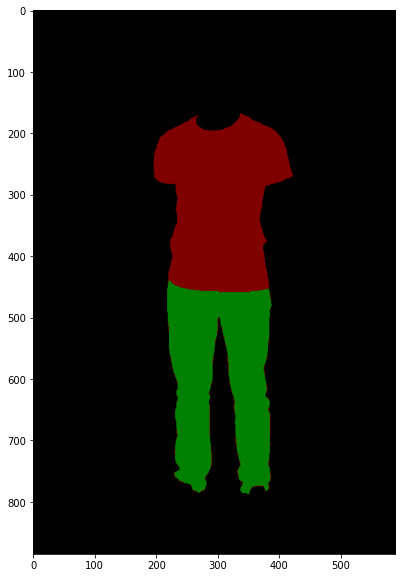

In [32]:
result = cv2.imread("/content/2_generated.png")
result = cv2.cvtColor(result, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (10,10))
plt.imshow(result)
plt.show()

# **End of Segmentation Program**